In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import re 

In [24]:
from sklearn.metrics import classification_report 
# import joblib # 파이프제작 파이프라인

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') 

import warnings 
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('./csv/test_swmotorcycle_False.csv')


In [26]:
# 범주형 데이터를 get_dummies 함수로 Onehot_인코딩 방법처럼 생성

dfd =df[['Gender','Area']]
dfd_dummies = pd.get_dummies(dfd)
df1 = df.drop(['Gender','Area'], axis='columns')
df2 = pd.concat([dfd_dummies,df1],axis=1)

In [27]:
# Risk 변수 생성
# 기존 claimNb는 그대로 놓고 claimNb이진분류한것 생성
# Risk 는 기존 climNb로 나누기
# Nb와 Amount를 더함(새로운 컬럼 생성), amount 와 새로운 컬럼 데이터 프레임으로 만든후 조건식 만들기
# target 변수 2진분류로 전환
df2['ClaimNb1'] = df2['ClaimNb']
df2["Frequency"]=df2["ClaimNb"]/np.round(df2["Exposure"], 2)
# df2 =df2.drop(columns='ClaimAmount')
# df2['ClaimNb1'].replace(2,1,inplace=True)



In [28]:
# 문자열을 숫자열로 바꾸기 (연속형데이터로 만들기) 

m2 = {
    "BM1" : 1,
    "BM2" : 2,
    "BM3" : 3,
    "BM4" : 4,
    "BM5" : 5,
    "BM6" : 6,
    "BM7" : 7
}

df2['BonusClass1'] = df2['BonusClass'].map(m2)

m3 = {
    "EV ratio 9-12": 3,
    "EV ratio 13-15": 4,
    "EV ratio 16-19": 5,
    "EV ratio 20-24" : 6,
    "EV ratio <5" : 1,
    "EV ratio 6-8" : 2,
    "EV ratio >25" : 7
}

df2['RiskClass1'] = df2['RiskClass'].map(m3)

In [29]:
# 이상치 제거 , 밑에 박스플롯 돌리면서 하기 
import numpy as np
for i in range(len(df2["OwnerAge"])):
    if df2["OwnerAge"][i] >= 80 :
        df2["OwnerAge"][i] = np.nan
    elif df2["OwnerAge"][i] < 16 :
        df2["OwnerAge"][i] = np.nan
    else:
        pass

for i in range(len(df2["VehAge"])):
    if df2["VehAge"][i] >= 40:
        df2["VehAge"][i] = np.nan
    else:
        pass


In [30]:
df2.drop(columns='ClaimNb', inplace=True)
df2 = df2.replace([np.inf, -np.inf], np.nan)

In [31]:
df2.dropna(axis=0,inplace=True)

In [32]:
df2.columns.value_counts()

Gender_Female                                                   1
RiskClass                                                       1
BonusClass1                                                     1
Frequency                                                       1
ClaimNb1                                                        1
ClaimAmount                                                     1
Exposure                                                        1
BonusClass                                                      1
VehAge                                                          1
OwnerAge                                                        1
Gender_Male                                                     1
Area_Suburbs; middle-sized cities                               1
Area_Small towns; countryside except Gotland; Northern towns    1
Area_Northern towns                                             1
Area_Northern countryside                                       1
Area_Lesse

In [13]:
# df2['Central']=df2["Area_Central parts of Sweden's three largest cities"]
# df2['Largest island']=df2["Area_Gotland (Sweden's largest island)"]
# df2['Lesser']=df2["Area_Lesser towns except Gotland; Northern towns"] 
# df2['Northern_countryside']=df2["Area_Northern countryside"] 
# df2['Northern towns']=df2["Area_Northern towns"] 
# df2['Small towns']=df2["Area_Small towns; countryside except Gotland; Northern towns"] 
# df2['Middle cities']=df2["Area_Suburbs; middle-sized cities"] 

In [14]:
# df2 = df2.drop(columns=["Area_Central parts of Sweden's three largest cities","Area_Gotland (Sweden's largest island)","Area_Lesser towns except Gotland; Northern towns","Area_Northern countryside","Area_Northern towns","Area_Small towns; countryside except Gotland; Northern towns","Area_Suburbs; middle-sized cities"] )

In [33]:
df2.rename(columns={"Area_Central parts of Sweden's three largest cities":"Central"},inplace=True)
df2.rename(columns={"Area_Gotland (Sweden's largest island)":"Largest island"},inplace=True)
df2.rename(columns={"Area_Lesser towns except Gotland; Northern towns":"Lesser"},inplace=True)
df2.rename(columns={"Area_Northern countryside":"Northern_countryside"},inplace=True)
df2.rename(columns={"Area_Northern towns":"Northern towns"},inplace=True)
df2.rename(columns={"Area_Small towns; countryside except Gotland; Northern towns":"Small towns"},inplace=True)
df2.rename(columns={"Area_Suburbs; middle-sized cities":"Middle cities"},inplace=True)



In [34]:
df2

,Gender_Female,Gender_Male,Central,Largest island,Lesser,Northern_countryside,Northern towns,Small towns,Middle cities,OwnerAge,RiskClass,VehAge,BonusClass,Exposure,ClaimAmount,ClaimNb1,Frequency,BonusClass1,RiskClass1
43,1,0,1,0,0,0,0,0,0,16.0,EV ratio 9-12,7.0,BM1,0.232877,0,0,0.0,1,3
45,1,0,0,0,1,0,0,0,0,16.0,EV ratio <5,15.0,BM1,0.501370,0,0,0.0,1,1
46,1,0,0,0,0,0,0,1,0,16.0,EV ratio <5,10.0,BM1,0.336986,0,0,0.0,1,1
47,1,0,0,0,0,0,0,1,0,16.0,EV ratio <5,10.0,BM2,0.249315,0,0,0.0,2,1
48,1,0,0,0,0,0,0,1,0,16.0,EV ratio <5,13.0,BM1,0.473973,0,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64473,0,1,0,0,0,0,0,1,0,79.0,EV ratio 16-19,12.0,BM7,0.410959,0,0,0.0,7,5
64474,0,1,0,0,0,0,1,0,0,79.0,EV ratio 16-19,2.0,BM7,0.983562,0,0,0.0,7,5
64476,0,1,0,0,0,1,0,0,0,79.0,EV ratio 6-8,17.0,BM7,0.476712,0,0,0.0,7,2
64477,0,1,0,0,0,1,0,0,0,79.0,EV ratio >25,17.0,BM7,0.523288,0,0,0.0,7,7


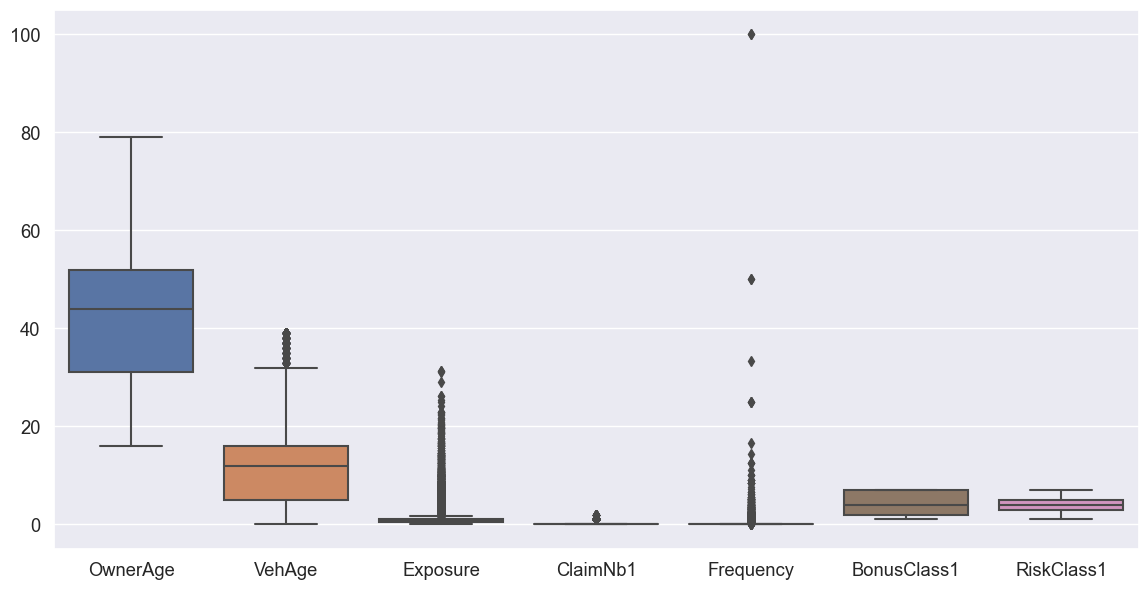

In [36]:
# 박스플롯 보기 (이상치 확인)
sns.boxplot(df2[['OwnerAge','VehAge','Exposure','ClaimNb1','Frequency','BonusClass1','RiskClass1']])
plt.show()

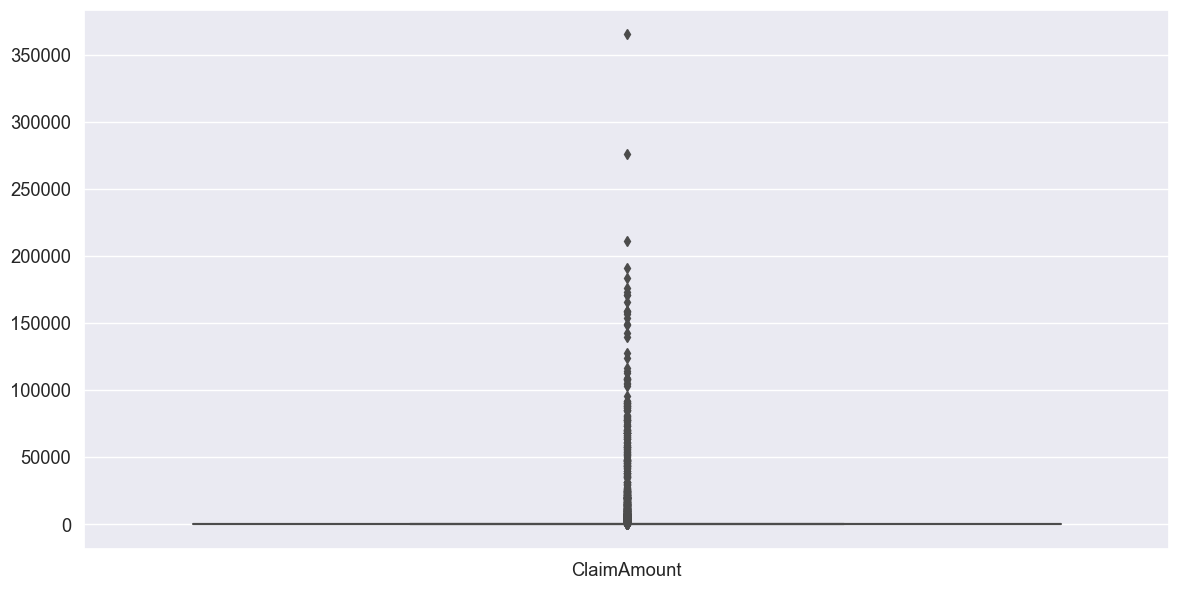

In [37]:
sns.boxplot(df2[['ClaimAmount']])
plt.show()

<AxesSubplot: >

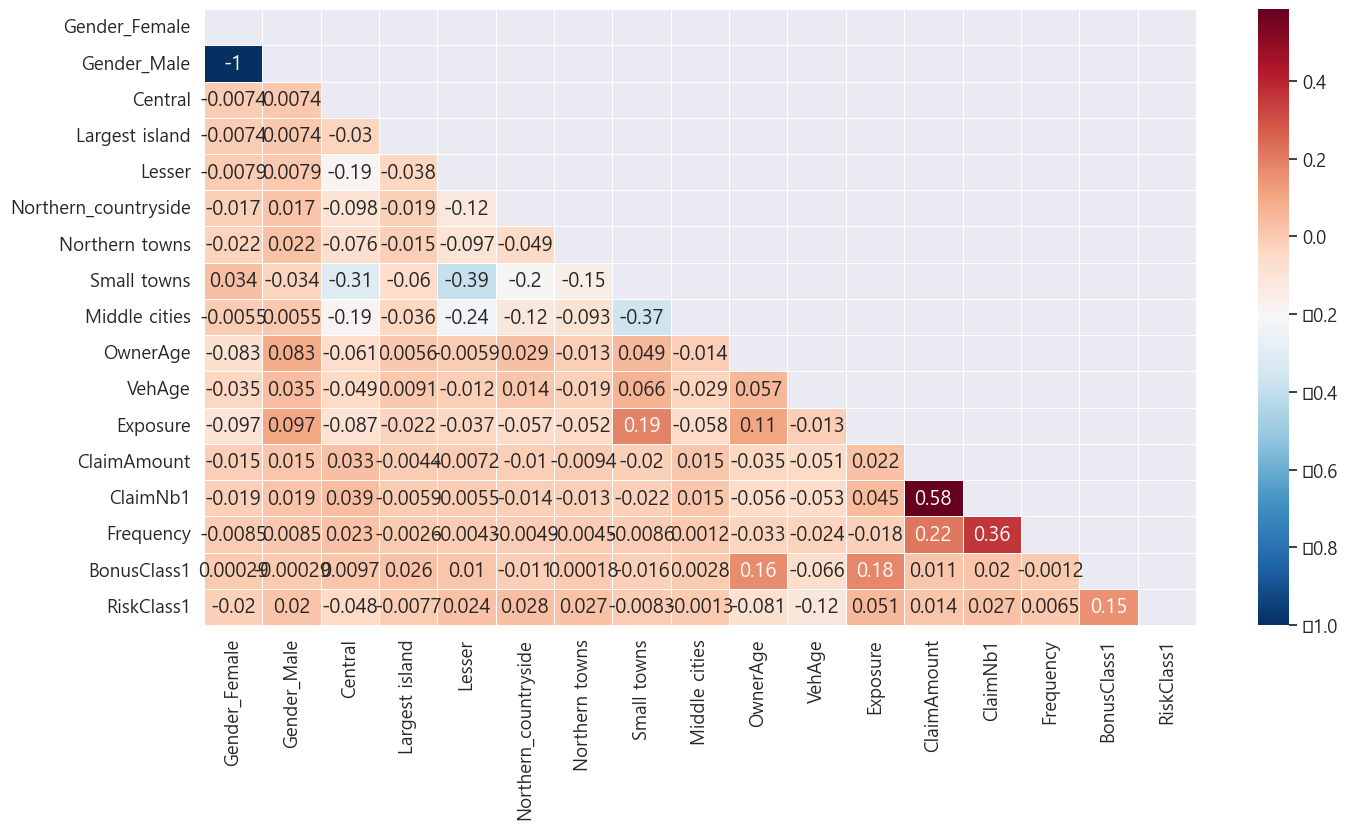

In [38]:
# 변수간 상관계수 파악
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

upp_mat = np.triu(df2.corr())

df_att = df2.corr(method='pearson')
plt.figure(figsize=(16,8))
sns.heatmap(df_att,
           xticklabels = df_att.columns,
           yticklabels = df_att.columns,
           cmap='RdBu_r',
           annot=True, 
           linewidth=0.5,vmin=-1,
           mask = upp_mat)

In [20]:
# sns.pairplot(df2[['OwnerAge','VehAge','Exposure','ClaimNb1','Frequency','BonusClass1','RiskClass1','ClaimAmount']])
# plt.show()


In [42]:
# 다중공선성 확인
#df2 = df2.drop(columns=["RiskClass","BonusClass"])
from statsmodels.stats.outliers_influence import variance_inflation_factor
feature = df2.drop(columns=["ClaimNb1","Gender_Female","Gender_Male","Small towns","Lesser","Middle cities","Central","Northern_countryside","Northern towns","Largest island"])
#"Central","Largest island", "Lesser",	"Northern_countryside","Northern towns","Small towns","Middle cities"
labels = df2['ClaimNb1']
vif = pd.DataFrame(
    [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])],
    index=feature.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
OwnerAge,7.029484
RiskClass1,5.208454
BonusClass1,4.217563
VehAge,2.994782
Exposure,1.692188
ClaimAmount,1.056349
Frequency,1.052248


### 모델링 시작

In [43]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size=0.25, random_state=0)

In [44]:
# train 값 MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

scalar = StandardScaler()
scalar_df = scalar.fit_transform(X_train)

df_scalar = pd.DataFrame(scalar_df)
df_scalar.describe()

,0,1,2,3,4,5,6
count,4.532200e+04,4.532200e+04,4.532200e+04,4.532200e+04,4.532200e+04,4.532200e+04,4.532200e+04
mean,6.647326e-17,-6.082931e-17,-5.957509e-18,3.135531e-18,3.762637e-18,7.525275e-17,1.755897e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.052741e+00,-1.536396e+00,-7.902424e-01,-5.812835e-02,-4.043159e-02,-1.302174e+00,-1.871213e+00
25%,-8.862042e-01,-8.668629e-01,-4.257589e-01,-5.812835e-02,-4.043159e-02,-8.776909e-01,-5.137780e-01
50%,1.247940e-01,7.048406e-02,-1.234034e-01,-5.812835e-02,-4.043159e-02,-2.872532e-02,1.649397e-01
75%,7.469467e-01,6.061109e-01,-3.849517e-02,-5.812835e-02,-4.043159e-02,1.244723e+00,8.436574e-01
max,2.846712e+00,3.685965e+00,2.279763e+01,7.734162e+01,1.442311e+02,1.244723e+00,2.201093e+00


In [45]:
#test 값 MinMaxScaler, standardscaler
test_scaled = scalar.transform(X_test)
df1_scalar = pd.DataFrame(test_scaled)
df1_scalar.describe()

,0,1,2,3,4,5,6
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,0.009407,0.003167,0.009734,0.004213,-0.002020,0.002940,0.005683
std,1.002794,1.002933,1.033451,1.099614,1.254012,1.004639,1.003968
min,-2.052741,-1.536396,-0.790242,-0.058128,-0.040432,-1.302174,-1.871213
25%,-0.886204,-0.866863,-0.421617,-0.058128,-0.040432,-0.877691,-0.513778
50%,0.124794,0.070484,-0.121332,-0.058128,-0.040432,-0.028725,0.164940
75%,0.746947,0.606111,-0.038495,-0.058128,-0.040432,1.244723,0.843657
max,2.846712,3.685965,22.894966,58.476348,144.231107,1.244723,2.201093


In [46]:
# 다중 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=156)
X_under2, y_under2 = rus.fit_resample(X_train, y_train)

In [47]:
y_under2.value_counts()

0    18
1    18
2    18
Name: ClaimNb1, dtype: int64

In [48]:
# 다중 오버 샘플링
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_over2, y_over2 = rus.fit_resample(X_train, y_train)

In [49]:
y_over2.value_counts()

0    44822
1    44822
2    44822
Name: ClaimNb1, dtype: int64

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from lightgbm import LGBMClassifier

# 오버샘플링 모델링 이진->다중

In [54]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    #SVC(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier()
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}



for clf in models:
    clf = clf.fit(X_over2, y_over2)
#1열:Train
    y_hat = clf.predict(X_over2)
    y_hat_pro = clf.predict_proba(X_over2) # 멀티클래스의 경우 auc값을 구하려면 y예측의 확률값과 실제y값을 비교해줘야한다.
    results_train  = (round(accuracy_score(y_over2,y_hat),2),round(roc_auc_score(y_over2,y_hat_pro, multi_class='ovr'),2))
#2열:Test
    y_hat = clf.predict(X_test)
    y_hat_pro = clf.predict_proba(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat, average="micro"),2),
                    round(recall_score(y_test,y_hat,average="macro"),2),
                    round(f1_score(y_test,y_hat,average="macro"),2),
                    round(roc_auc_score(y_test,y_hat_pro, multi_class='ovr'),2))


    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_val'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf

(0.82, 0.93) (1.0, 1.0, 0.85, 0.71, 1.0)
(0.96, 1.0) (1.0, 1.0, 0.78, 0.66, 0.91)
(1.0, 1.0) (1.0, 1.0, 0.7, 0.72, 0.85)
(1.0, 1.0) (1.0, 1.0, 0.66, 0.66, 0.98)
(1.0, 1.0) (1.0, 1.0, 0.74, 0.77, 0.98)
(1.0, 1.0) (1.0, 1.0, 0.74, 0.77, 1.0)


,model,acc_train,auc_train,acc_val,precision,recall,f1_score,AUC_val
0,LogisticRegression(),0.82,0.93,1.0,1.0,0.85,0.71,1.00
1,KNeighborsClassifier(),0.96,1.00,1.0,1.0,0.78,0.66,0.91
2,DecisionTreeClassifier(),1.00,1.00,1.0,1.0,0.70,0.72,0.85
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,1.0,1.0,0.66,0.66,0.98
4,"XGBClassifier(base_score=None, booster=None, c...",1.00,1.00,1.0,1.0,0.74,0.77,0.98
5,LGBMClassifier(),1.00,1.00,1.0,1.0,0.74,0.77,1.00


# 언더샘플링 모델링

In [57]:
models = [
    RandomForestClassifier(), 
    LogisticRegression(),
    #SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
    LGBMClassifier()
    ]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'auc_test':[]}

    
for clf in models:
    clf = clf.fit(X_under2, y_under2)
#1열:Train
    y_hat = clf.predict(X_under2)
    y_hat_pro = clf.predict_proba(X_under2) # 멀티클래스의 경우 auc값을 구하려면 y예측의 확률값과 실제y값을 비교해줘야한다.
    results_train  = (round(accuracy_score(y_under2,y_hat),2),round(roc_auc_score(y_under2,y_hat_pro, multi_class='ovr'),2))
#2열:Test
    y_hat = clf.predict(X_test)
    y_hat_pro = clf.predict_proba(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat, average="micro"),2),
                    round(recall_score(y_test,y_hat,average="macro"),2),
                    round(f1_score(y_test,y_hat,average="macro"),2),
                    round(roc_auc_score(y_test,y_hat_pro, multi_class='ovr'),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_test'].append(results[4])   

    print(results_train, results)

rdf2 = pd.DataFrame(data=rdict)
rdf2

(1.0, 1.0) (1.0, 1.0, 0.76, 0.67, 1.0)
(0.91, 0.97) (1.0, 1.0, 0.73, 0.64, 1.0)
(1.0, 1.0) (1.0, 1.0, 0.84, 0.75, 0.92)
(0.85, 0.95) (1.0, 1.0, 0.68, 0.62, 0.98)
(1.0, 1.0) (1.0, 1.0, 0.75, 0.67, 0.97)
(0.93, 1.0) (1.0, 1.0, 0.73, 0.66, 1.0)


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,auc_test
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,1.0,1.0,0.76,0.67,1.00
1,LogisticRegression(),0.91,0.97,1.0,1.0,0.73,0.64,1.00
2,DecisionTreeClassifier(),1.00,1.00,1.0,1.0,0.84,0.75,0.92
3,KNeighborsClassifier(),0.85,0.95,1.0,1.0,0.68,0.62,0.98
4,"XGBClassifier(base_score=None, booster=None, c...",1.00,1.00,1.0,1.0,0.75,0.67,0.97
5,LGBMClassifier(),0.93,1.00,1.0,1.0,0.73,0.66,1.00


밑에 부터는 해석 필요 X

### LGBMClassifier

In [ ]:
## lightgbm
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# lgb = LGBMClassifier()
# param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
#              "max_depth" : [25, 50, 75],
#              "num_leaves" : [100,300,500,900,1200],
#              "n_estimators" : [100, 200, 300,500,800,1000],
#              "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5]
#               }

# gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)
# gscv_lgb.fit(X_over2, y_over2)

# print('LGB 파라미터: ', gscv_lgb.best_params_)
# print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
# print("="*30)

하이퍼파라미터 조정 (NOT 일반 파라미터)

In [ ]:
# import optuna
# from optuna import Trial
# from optuna.samplers import TPESampler
# from sklearn.metrics import log_loss

In [ ]:
# def objective(trial: Trial) -> float:
#     params_lgb = {
#         "random_state": 42,
#         "verbosity": -1,
#         "learning_rate": 0.05,
#         "n_estimators": 10000,
#         "objective": "multiclass",
#         "metric": "multi_logloss",
#         "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
#         "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
#         "max_depth": trial.suggest_int("max_depth", 1, 20),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
#         "subsample": trial.suggest_float("subsample", 0.3, 1.0),
#         "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#         "max_bin": trial.suggest_int("max_bin", 200, 500),
#     }

#     model = LGBMClassifier(**params_lgb)
#     model.fit(
#         X_over2,
#         y_over2,
#         eval_set=[(X_over2, y_over2), (X_test, y_test)],
#         early_stopping_rounds=100,
#         verbose=False,
#     )

#     lgb_pred = model.predict_proba(X_test)
#     log_score = log_loss(y_test, lgb_pred)
    
#     return log_score

In [ ]:
# sampler = TPESampler(seed=42)
# study = optuna.create_study(
#     study_name="lgbm_parameter_opt",
#     direction="minimize",
#     sampler=sampler,
# )
# study.optimize(objective, n_trials=10)
# print("Best Score:", study.best_value)
# print("Best trial:", study.best_trial.params)

In [ ]:
# # 시각화
# optuna.visualization.plot_optimization_history(study)

In [ ]:
# # 파라미터들관의 관계
# optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# # 각 파라미터들의 상관관계
# optuna.visualization.plot_contour(
#     study,
#     params=[
#         "max_depth",
#         "num_leaves",
#         "colsample_bytree",
#         "subsample",
#         "subsample_freq",
#         "min_child_samples",
#         "max_bin",
#     ],
# )

In [ ]:
# # 하이퍼파라미터 중요도
# optuna.visualization.plot_param_importances(study)

여기서 부터는 실패한 코드 모음

In [ ]:
# import sys,importlib
# importlib.reload(sys)


In [ ]:
# # GridSearchCV 결과 추출하여 DataFrame으로 변환
# scores_df = pd.DataFrame(grid.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', \
#             'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
# print("Best Parameters : ", grid.best_params_)
# print("Best estimator : ", grid.best_estimator_)
# print("Best Score : ", grid.best_score_)
# print("Best Test Score : ", grid.score(X_test, y_test))

In [ ]:
# evals = [(X_test, y_test)]
# dt_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
# preds = dt_model.predict(X_test)
# pred_proba = dt_model.predict_proba(X_test)[:,1]


Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
dt_model = LogisticRegression()
dt_model.fit(X_over2, y_over2)
# dt_model.predict(X_test)

LogisticRegression()

In [ ]:
dt_model.get_params()

In [60]:
param_dict ={
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [61]:
penalty = ['l1', 'l2'] # 페널티(penalty) 하이퍼파라미터 값의 후보를 만듭니다.
C = np.logspace(0, 4, 10) # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.

param_dict = dict(C=C, penalty=penalty)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_over2, y_over2)


In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_over2, y_over2)
# dt_model.predict(X_test)

DecisionTreeClassifier()

In [ ]:
dt_model.get_params()

In [ ]:
param_dict = {
    "criterion":["gini", "entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=5)
grid.fit(X_over2, y_over2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

LightGBM

In [ ]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lgb_model2 = LGBMRegressor(n_estimators = 100)
evals = [(X_over2, y_over2),(X_test, y_test)]
lgb_model2.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE : {0:.3f} , RMSE : {0:.3f}, r2 : {2:.3f}'.format(mse,rmse,r2))

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

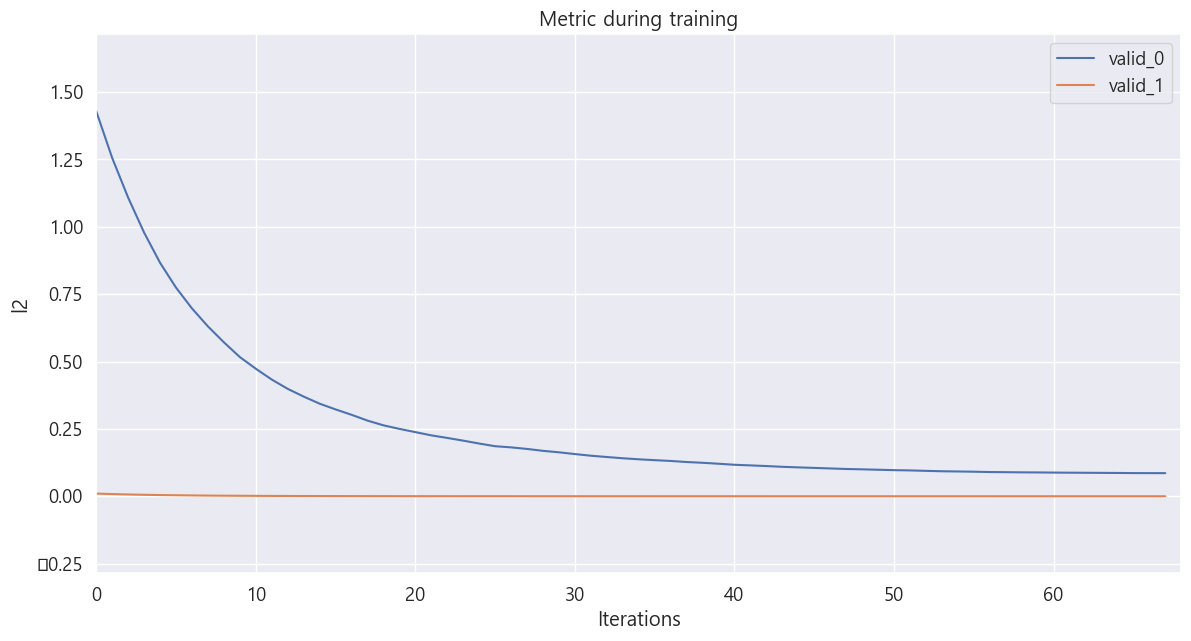

In [64]:
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

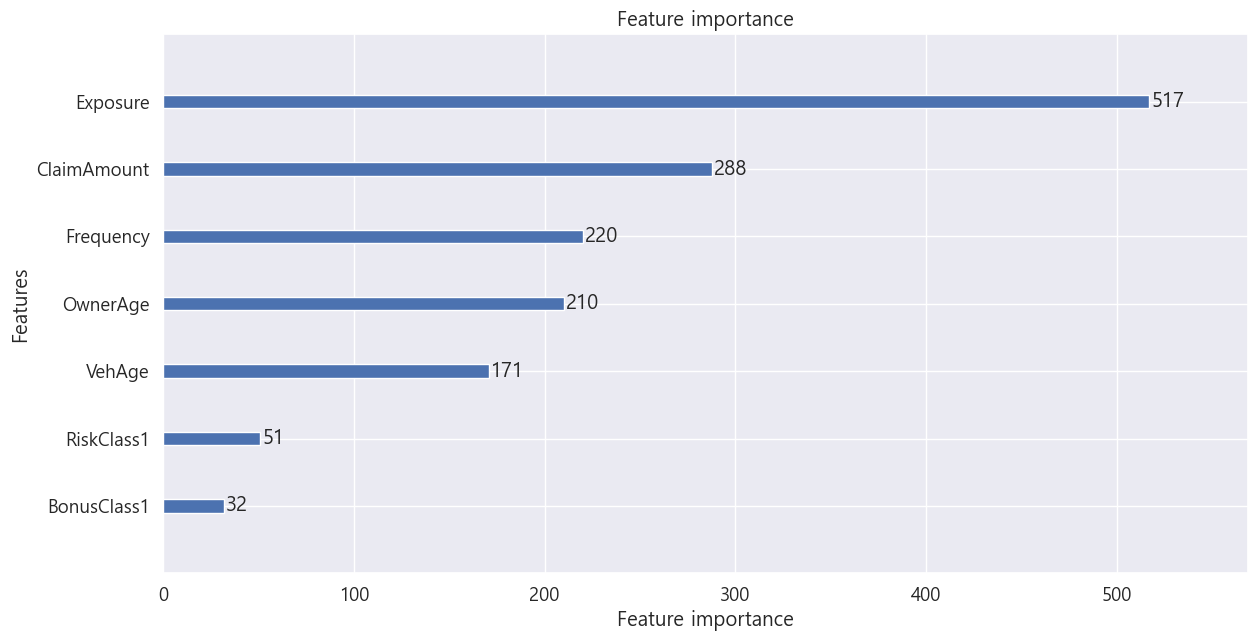

In [65]:
lgb.plot_importance(lgb_model2)